## Part-1 the Linear-Regression Model

In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression

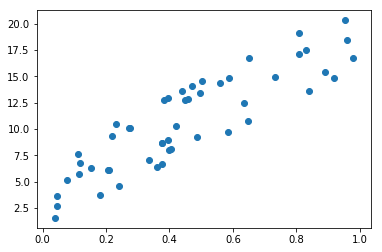

In [55]:
def assmuing_function(x):
    return 15*x + 4 + random.randint(-3,3)

random_data = np.random.random((50,1))
X = random_data[:,0]
y = [assmuing_function(x) for x in X]
plt.scatter(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\markers.py:373: MatplotlibDeprecationWarning: 
Setting a circle marker using `(..., 3)` is deprecated since Matplotlib 3.0, and support for it will be removed in 3.2.  Directly pass 'o' instead.
  "3.0", "Setting a circle marker using `(..., 3)` is "


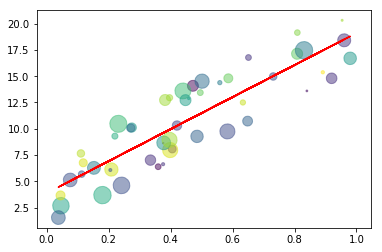

In [58]:
x = X.reshape(-1,1)
reg = LinearRegression() #估计器estimator，依据观测值预测结果
reg = reg.fit(x,y)  #分析模型参数

def f(x):
    return reg.coef_ * x + reg.intercept_

n=50
colors = np.random.rand(n) #随机产生50个颜色值
area = np.pi * (10 * np.random.rand(n))**2  #点的半径范围:0~10
plt.scatter(x,y,s=area, c=colors, alpha=0.5, marker=(9, 3, 30)) #散点图
plt.plot(x,f(x),'r',) # 曲线图


In [103]:
reg.predict([[0.4]])#.predict()通过 fit() 算出的模型参数构成的模型，预测值

array([9.96988267])

## Part-2 KNN Model

In [94]:
from scipy.spatial.distance import cosine
import math as m
from numpy import *

In [95]:
def model(x,y):
    return [(xi,yi) for xi,yi in zip(x,y)]

In [104]:
model(X,y)

[(0.4721459122259568, 14.082188683389353),
 (0.07604794545377525, 5.140719181806629),
 (0.4959373972013317, 13.439060958019976),
 (0.9537667497243708, 20.30650124586556),
 (0.3350951498799084, 7.026427248198626),
 (0.8084374685202238, 17.12656202780336),
 (0.208944421717281, 6.134166325759216),
 (0.18014848312572773, 3.702227246885916),
 (0.23142476344996832, 10.471371451749524),
 (0.9198687206447393, 14.79803080967109),
 (0.2746899822508424, 10.120349733762636),
 (0.11061383513107748, 7.659207526966162),
 (0.3758744528363871, 6.638116792545807),
 (0.152606677122344, 6.289100156835159),
 (0.8913368999480875, 15.370053499221314),
 (0.6334063661641393, 12.501095492462088),
 (0.20557673498792095, 6.083651024818814),
 (0.220309674320589, 9.304645114808835),
 (0.9604015968012624, 18.406023952018934),
 (0.04610682707263358, 2.691602406089504),
 (0.6514074061067053, 16.77111109160058),
 (0.11311538661372733, 5.69673079920591),
 (0.43972726893780967, 13.595909034067144),
 (0.04481654277176372,

In [97]:
def distance(x1,x2):
    vector1 = mat([x1])
    vector2 = mat([x2])
    return sum(abs(vector1-vector2)) #曼哈顿距离

In [98]:
distance(7,3)

4

In [109]:
def predict(x,k=6):
    most_similars = sorted(model(X,y),key=lambda xi: distance(xi[0],x))[:k]
    y_hats = [_y for x,_y in most_similars]
    print(most_similars)
      
    return np.mean(y_hats)

In [113]:
predict(0.4)

[(0.3986260627653875, 7.979390941480812), (0.39671166537429736, 12.95067498061446), (0.3966050288097025, 8.949075432145538), (0.40541036631835625, 8.081155494775345), (0.38225207429627417, 12.733781114444113), (0.420682031044017, 10.310230465660254)]


10.167384738186755

## Part-3 the Decision Tree

In [1]:
from collections import Counter
from icecream import ic
import pandas as pd  #数据分析包

In [183]:
#混乱程度
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
     
    return -np.sum(np.fromiter(((p * np.log(p)) for p in probs),float))

In [184]:
entropy([3,2,5,1])

ic| probs: [0.25, 0.25, 0.25, 0.25]


1.3862943611198906

In [205]:
mock_data = {
    'gender':['F','F','F','F','M','M','M'],
    'income':['+10','-10','+10','+10','+10','+10','-10'],
    'family_number':[1, 1, 2, 1, 1, 1, 2],
    'bought':[1, 1, 1, 0, 0, 0, 1,]
}

In [206]:
dataset = pd.DataFrame.from_dict(mock_data)

In [207]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [208]:
def find_the_optimal_spliter(training_data:pd.DataFrame, target:str) ->str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf') #正无穷（负无穷：float('-inf'）)
    
    for f in x_fields:
        values = set(training_data[f]) #eg. f:'gender' --> values = {'M', 'F'}
        for v in values:
            #按f列中的v元素，筛出列出 对应的 目的（target）列 的元素（0,1） 的列表
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            entropy_1 = entropy(sub_spliter_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            entropy_2 = entropy(sub_spliter_2)
            
            entropy_v = entropy_1 + entropy_2
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f,v)
                
    print('spliter is: {}'.format(spliter))
    print('the min_entropy is: {}'.format(min_entropy))
    
    return spliter

In [212]:
find_the_optimal_spliter(training_data=dataset,target='bought')

ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.25, 0.75]
ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]


spliter is: ('family_number', 2)
the min_entropy is: 0.6730116670092565


('family_number', 2)

In [210]:
find_the_optimal_spliter(training_data=dataset,target='family_number')

ic| probs: [1.0]
ic| probs: [0.5, 0.5]
ic| probs: [0.5, 0.5]
ic| probs: [1.0]
ic| probs: [0.8, 0.2]
ic| probs: [0.5, 0.5]
ic| probs: [0.5, 0.5]
ic| probs: [0.8, 0.2]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.75, 0.25]
ic| probs: [0.75, 0.25]
ic| probs: [0.6666666666666666, 0.3333333333333333]


spliter is: ('bought', 1)
the min_entropy is: 0.6931471805599453


('bought', 1)

In [217]:
#'bought'为目标，在上一步选出最优分割特征后，选次优分割特征，结果为('income','-10')
find_the_optimal_spliter(dataset[dataset['family_number']==1],'bought')

ic| probs: [0.75, 0.25]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [0.75, 0.25]
ic| probs: [1.0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| probs: []


spliter is: ('income', '-10')
the min_entropy is: 0.5623351446188083


('income', '-10')

In [193]:
ic('a')

ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in an interpreter (e.g. python -i), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?


'a'

## Part-4 the K-Means using 2-D matplotlib

In [230]:
from sklearn.cluster import KMeans
from collections import defaultdict

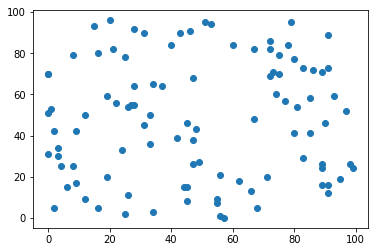

In [223]:
X1 = [random.randint(0,100) for i in range(100)]
X2 = [random.randint(0,100) for i in range(100)]
plt.scatter(X1,X2)

In [235]:
training_data = [[x1,x2] for x1,x2 in zip(X1,X2)]

In [236]:
cluster = KMeans(n_clusters=6, max_iter=500) 
#max_iter： 执行一次k-means算法所进行的最大迭代数

In [237]:
cluster.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

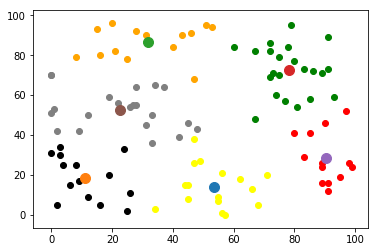

In [238]:
centers = defaultdict(list) # 构建一个默认value为list的字典

for label, location in zip(cluster.labels_, training_data):
    centers[label].append(location)

color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):  #i: 类，c: 坐标
    for location in centers[c]:
        plt.scatter(*location, c=color[i]) #每个样本的类为i,给每个样本赋第i个颜色
        
for center in cluster.cluster_centers_:  #簇中心
    plt.scatter(*center, s=100)  